In [2]:
import pandas as pd
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from matplotlib.colors import to_rgba
import numpy as np
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colorbar
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import fig_text
import math
import json

In [3]:
#load json file
#statsbomb data:  statsbomb/open-data/event/15973.json
with open('...\15973.json') as f:
    data = json.load(f)
    
#Convert to dataframe
data = pd.DataFrame(data)

c:\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (98,208,209,220,282,284,285,288,290,292,293,295,297,298,299,300,301) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
data.head()

,id,index,period,timestamp,minute,second,type/id,type/name,possession,possession_team/id,...,clearance/aerial_won,pass/deflected,substitution/outcome/id,substitution/outcome/name,substitution/replacement/id,substitution/replacement/name,pass/cut_back,related_events/4,foul_committed/penalty,foul_won/penalty
0,89943364-a86a-4066-a97e-63a60a0ccd42,1,1,00:00:00.000,0,0,35,Starting XI,1,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,242d870b-c848-4adf-8a35-e50585ac2cf0,2,1,00:00:00.000,0,0,35,Starting XI,1,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ac891574-04f4-478b-a2e1-ed5b5f8f955a,3,1,00:00:00.000,0,0,18,Half Start,1,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0e039840-fd05-4c87-b523-72cf5d585322,4,1,00:00:00.000,0,0,18,Half Start,1,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,96fd24e2-26cc-41e0-9817-3d2af2ee1597,5,1,00:00:01.099,0,1,30,Pass,2,902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#list all columns
data.columns.tolist()

['id',
 'index',
 'period',
 'timestamp',
 'minute',
 'second',
 'type/id',
 'type/name',
 'possession',
 'possession_team/id',
 'possession_team/name',
 'play_pattern/id',
 'play_pattern/name',
 'team/id',
 'team/name',
 'duration',
 'tactics/formation',
 'tactics/lineup/0/player/id',
 'tactics/lineup/0/player/name',
 'tactics/lineup/0/position/id',
 'tactics/lineup/0/position/name',
 'tactics/lineup/0/jersey_number',
 'tactics/lineup/1/player/id',
 'tactics/lineup/1/player/name',
 'tactics/lineup/1/position/id',
 'tactics/lineup/1/position/name',
 'tactics/lineup/1/jersey_number',
 'tactics/lineup/2/player/id',
 'tactics/lineup/2/player/name',
 'tactics/lineup/2/position/id',
 'tactics/lineup/2/position/name',
 'tactics/lineup/2/jersey_number',
 'tactics/lineup/3/player/id',
 'tactics/lineup/3/player/name',
 'tactics/lineup/3/position/id',
 'tactics/lineup/3/position/name',
 'tactics/lineup/3/jersey_number',
 'tactics/lineup/4/player/id',
 'tactics/lineup/4/player/name',
 'tactics/li

In [6]:
#filter the data for barcelona
team=data[data['team/name']=='Barcelona']

In [7]:
team.head()

,id,index,period,timestamp,minute,second,type/id,type/name,possession,possession_team/id,...,clearance/aerial_won,pass/deflected,substitution/outcome/id,substitution/outcome/name,substitution/replacement/id,substitution/replacement/name,pass/cut_back,related_events/4,foul_committed/penalty,foul_won/penalty
0,89943364-a86a-4066-a97e-63a60a0ccd42,1,1,00:00:00.000,0,0,35,Starting XI,1,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0e039840-fd05-4c87-b523-72cf5d585322,4,1,00:00:00.000,0,0,18,Half Start,1,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5790ff34-9dd8-4d5f-8930-f0e90a5488e9,10,1,00:00:06.745,0,6,30,Pass,2,902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,ac99e893-7b24-424e-a803-c48582bda40e,11,1,00:00:08.348,0,8,42,Ball Receipt*,2,902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,ff6f4062-308b-4dab-9c63-252d2ada662c,12,1,00:00:08.348,0,8,43,Carry,2,902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#pass outcomes
team['pass/outcome/name'].value_counts()

Incomplete      58
Out              6
Pass Offside     2
Name: pass/outcome/name, dtype: int64

In [9]:
#filter for only passes and then succesfull passes
passes = team[team['type/name']=="Pass"]
compl_passes=passes[passes['pass/outcome/name'].isnull()]

#identify passer and recipient
compl_passes['passer']=compl_passes['pass/recipient/name']
compl_passes['recipient']=compl_passes['passer'].shift(-1)

<ipython-input-9-0b7728aa7e58>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compl_passes['passer']=compl_passes['pass/recipient/name']
<ipython-input-9-0b7728aa7e58>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compl_passes['recipient']=compl_passes['passer'].shift(-1)


In [10]:
#find the first subsititution and filter the successful dataframe to be less than that minute
subs=team[team['type/name'] == 'Substitution']
subs = subs['minute']
firstSub = subs.min()

compl_passes=compl_passes[compl_passes['minute']<firstSub]

In [11]:
#find average Location for every passer
avg_loc_and_count=compl_passes.groupby('passer').agg({'location/0': ['mean'], 'location/1': ['mean','count']})
avg_loc_and_count.columns = ['x', 'y', 'count']

In [12]:
avg_loc_and_count

,x,y,count
passer,,,
Gerard Piqué Bernabéu,50.257143,45.742857,35
Ivan Rakitić,70.545455,45.606061,66
Jordi Alba Ramos,74.700000,23.425000,40
Lionel Andrés Messi Cuccittini,79.616667,51.150000,60
Luis Alberto Suárez Díaz,77.850000,41.200000,20
Marc-André ter Stegen,37.000000,30.000000,7
Ousmane Dembélé,83.219512,30.073171,41
Philippe Coutinho Correia,70.211268,29.816901,71
Samuel Yves Umtiti,51.361111,38.666667,36


In [13]:
#find number of passes for each pass between passer and recipient
paths=compl_passes.groupby(['passer','recipient']).id.count().reset_index()
paths.rename({'id':'pass_count'},axis='columns',inplace=True)

In [14]:
#merge the average location dataframe. Fist merge on the passer then on the recipient
paths=paths.merge(avg_loc_and_count, left_on='passer', right_index=True)
paths = paths.merge(avg_loc_and_count, left_on='recipient', right_index=True,suffixes=['', '_end'])

In [17]:
paths.head()

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end,width
0,Gerard Piqué Bernabéu,Ivan Rakitić,8,50.257143,45.742857,35,70.545455,45.606061,66,6.857143
17,Jordi Alba Ramos,Ivan Rakitić,2,74.700000,23.425000,40,70.545455,45.606061,66,1.714286
26,Lionel Andrés Messi Cuccittini,Ivan Rakitić,9,79.616667,51.150000,60,70.545455,45.606061,66,7.714286
35,Luis Alberto Suárez Díaz,Ivan Rakitić,3,77.850000,41.200000,20,70.545455,45.606061,66,2.571429
44,Ousmane Dembélé,Ivan Rakitić,4,83.219512,30.073171,41,70.545455,45.606061,66,3.428571


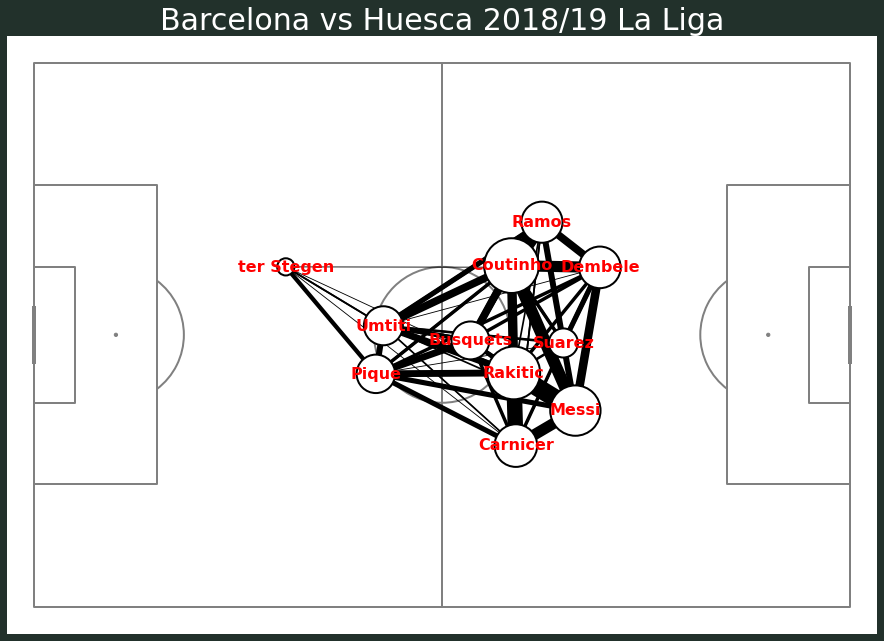

In [15]:
#change players' names full name to surname
avg_loc_and_count.index=(['Pique','Rakitic','Ramos','Messi','Suarez','ter Stegen','Dembele','Coutinho','Umtiti','Carnicer','Busquets'])

#line width and marker sizes relative to the largest counts
MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000

paths['width'] = (paths.pass_count / paths.pass_count.max() * MAX_LINE_WIDTH)

avg_loc_and_count['marker_size'] = (avg_loc_and_count['count']/ avg_loc_and_count['count'].max() * MAX_MARKER_SIZE)

pitch = Pitch(pitch_type = 'statsbomb', orientation = 'horizontal',
              pitch_color = 'white', line_color = 'grey')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

#plot pass lines
pass_lines=pitch.lines(paths.x, paths.y,
             paths.x_end, paths.y_end, lw=paths.width,
             color = 'black', ax = ax, label = 'completed passes')


#plot players' position
pass_nodes = pitch.scatter(avg_loc_and_count.x,avg_loc_and_count.y,s=avg_loc_and_count.marker_size,
                           color='white', edgecolors="black", linewidth=2, alpha=1, ax=ax, zorder=2)

for index, row in avg_loc_and_count.iterrows():  
    pitch.annotate(row.name, xy=(row.x, row.y),c='red', va='center',
                   ha='center', size=16, weight='bold', ax=ax)
    


ax.set_title('Barcelona vs Huesca 2018/19 La Liga', fontsize = 30,color='white');
fig.set_facecolor('#22312b')
fig.set_constrained_layout(False)